In [1]:
import tensorflow as tf

In [2]:
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
from keras.models import Model
from keras.layers.merge import concatenate

In [5]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, AveragePooling2D, Flatten, GlobalAveragePooling2D, Dense, Dropout
from keras.layers.merge import concatenate

In [6]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

In [7]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/DL sem7/Potato/Train",
    shuffle = True,
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 900 files belonging to 3 classes.


In [8]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/DL sem7/Potato/Valid",
    shuffle = True,
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 300 files belonging to 3 classes.


In [9]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/DL sem7/Potato/Test",
    shuffle = True,
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 300 files belonging to 3 classes.


In [10]:
class_names = train_ds.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [11]:
for image_batch, label_batch in train_ds.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[1 1 0 1 0 2 2 2 1 0 1 2 0 1 2 1 0 0 1 2 1 1 1 1 1 0 0 1 1 0 0 1]


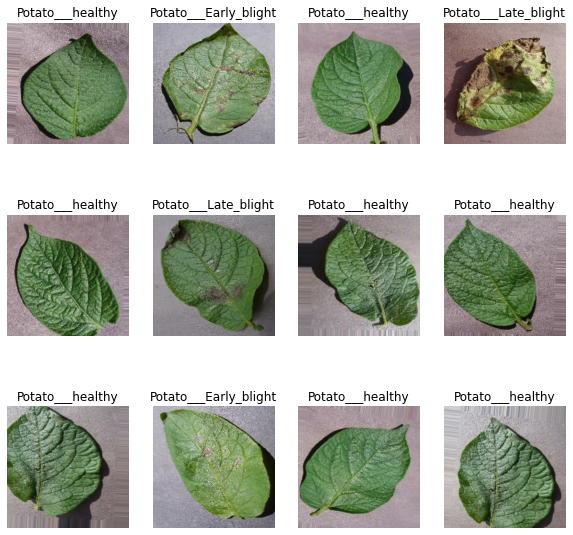

In [ ]:
plt.figure(figsize = (10,10))
for image_batch, label_batch in train_ds.take(1):
    for i in range(12):
        plt.subplot(3,4, i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [12]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)     # all this is to improve the performacne
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)    
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)     

In [ ]:
# lets do some preprocessing

In [13]:
'''
These layers are for preprocessing and we will use it later while model building. One is to resize the image and other divides
the size of 256 by 255 to get a number between 0 and 1
'''
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [14]:
'''
Data Augmentation is needed when we have less data, this boosts the accuracy of our model by augmenting the data.
'''
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [15]:
# model building

In [16]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [17]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

In [18]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [19]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=50,
)

Epoch 1/50
29/29 [==============================] - 110s 1s/step - loss: 1.0961 - accuracy: 0.3522 - val_loss: 1.0767 - val_accuracy: 0.6567
Epoch 2/50
29/29 [==============================] - 2s 77ms/step - loss: 1.0736 - accuracy: 0.3967 - val_loss: 0.9706 - val_accuracy: 0.4833
Epoch 3/50
29/29 [==============================] - 2s 76ms/step - loss: 0.6505 - accuracy: 0.7089 - val_loss: 0.5415 - val_accuracy: 0.7533
Epoch 4/50
29/29 [==============================] - 2s 76ms/step - loss: 0.4707 - accuracy: 0.8067 - val_loss: 0.4113 - val_accuracy: 0.7800
Epoch 5/50
29/29 [==============================] - 2s 76ms/step - loss: 0.4630 - accuracy: 0.8022 - val_loss: 0.3778 - val_accuracy: 0.8200
Epoch 6/50
29/29 [==============================] - 2s 76ms/step - loss: 0.4082 - accuracy: 0.8300 - val_loss: 0.3164 - val_accuracy: 0.8700
Epoch 7/50
29/29 [==============================] - 2s 76ms/step - loss: 0.3120 - accuracy: 0.8789 - val_loss: 0.3659 - val_accuracy: 0.8433
Epoch 8/50
29

In [20]:
scores = model.evaluate(test_ds)

10/10 [==============================] - 40s 30ms/step - loss: 0.2152 - accuracy: 0.9233


In [21]:
scores

[0.21516413986682892, 0.9233333468437195]

In [22]:
history

In [23]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 29}

In [24]:
history.history

{'loss': [1.0960677862167358,
  1.0735819339752197,
  0.6504587531089783,
  0.47073614597320557,
  0.46297505497932434,
  0.40821748971939087,
  0.3119620978832245,
  0.35268041491508484,
  0.3175831437110901,
  0.2863157093524933,
  0.2839019298553467,
  0.2648453116416931,
  0.2880834937095642,
  0.2540736794471741,
  0.2502792775630951,
  0.2976379990577698,
  0.2550947666168213,
  0.21396410465240479,
  0.19766828417778015,
  0.20826546847820282,
  0.19172941148281097,
  0.18221157789230347,
  0.18406035006046295,
  0.28295600414276123,
  0.2404269427061081,
  0.20636820793151855,
  0.1817137449979782,
  0.21905697882175446,
  0.15277020633220673,
  0.16567756235599518,
  0.12271926552057266,
  0.16173133254051208,
  0.18626146018505096,
  0.14817480742931366,
  0.1326378434896469,
  0.17343230545520782,
  0.12420101463794708,
  0.12792682647705078,
  0.15419797599315643,
  0.15560941398143768,
  0.11634078621864319,
  0.1226077601313591,
  0.09562153369188309,
  0.1264548599720001

In [25]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

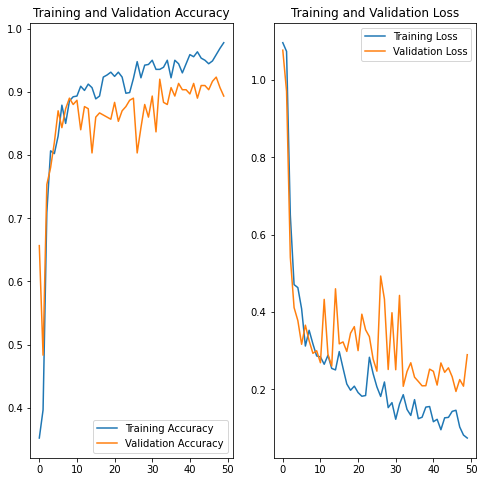

In [26]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Potato___Late_blight
predicted label: Potato___Late_blight


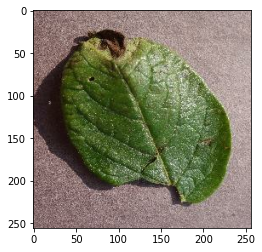

In [27]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [28]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

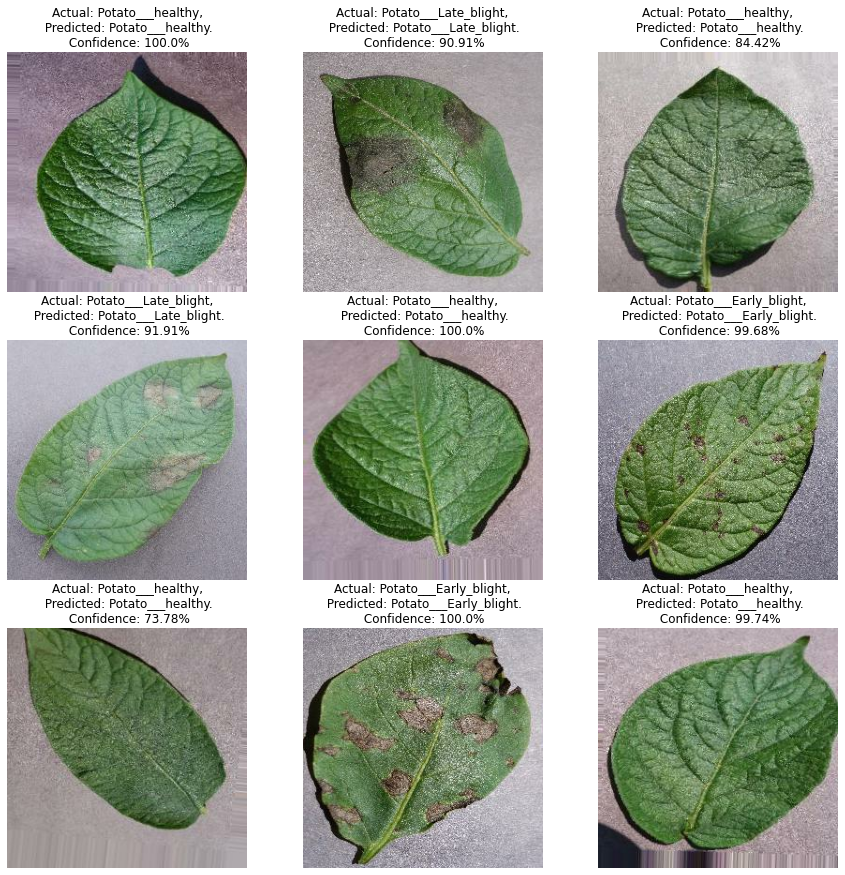

In [29]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [30]:
model.save("../potatoes.h5")

GoogleNet

In [31]:
def Inception_block(input_layer, f1, f2_conv1, f2_conv3, f3_conv1, f3_conv5, f4): 
  # Input: 
  # - f1: number of filters of the 1x1 convolutional layer in the first path
  # - f2_conv1, f2_conv3 are number of filters corresponding to the 1x1 and 3x3 convolutional layers in the second path
  # - f3_conv1, f3_conv5 are the number of filters corresponding to the 1x1 and 5x5  convolutional layer in the third path
  # - f4: number of filters of the 1x1 convolutional layer in the fourth path

  # 1st path:
  path1 = Conv2D(filters=f1, kernel_size = (1,1), padding = 'same', activation = 'relu')(input_layer)

  # 2nd path
  path2 = Conv2D(filters = f2_conv1, kernel_size = (1,1), padding = 'same', activation = 'relu')(input_layer)
  path2 = Conv2D(filters = f2_conv3, kernel_size = (3,3), padding = 'same', activation = 'relu')(path2)

  # 3rd path
  path3 = Conv2D(filters = f3_conv1, kernel_size = (1,1), padding = 'same', activation = 'relu')(input_layer)
  path3 = Conv2D(filters = f3_conv5, kernel_size = (5,5), padding = 'same', activation = 'relu')(path3)

  # 4th path
  path4 = MaxPooling2D((3,3), strides= (1,1), padding = 'same')(input_layer)
  path4 = Conv2D(filters = f4, kernel_size = (1,1), padding = 'same', activation = 'relu')(path4)

  output_layer = concatenate([path1, path2, path3, path4], axis = -1)

  return output_layer

In [32]:
def GoogLeNet():
  # input layer 
  input_layer = Input(shape = (256, 256, 3))

  # convolutional layer: filters = 64, kernel_size = (7,7), strides = 2
  X = Conv2D(filters = 64, kernel_size = (7,7), strides = 2, padding = 'valid', activation = 'relu')(input_layer)

  # max-pooling layer: pool_size = (3,3), strides = 2
  X = MaxPooling2D(pool_size = (3,3), strides = 2)(X)

  # convolutional layer: filters = 64, strides = 1
  X = Conv2D(filters = 64, kernel_size = (1,1), strides = 1, padding = 'same', activation = 'relu')(X)

  # convolutional layer: filters = 192, kernel_size = (3,3)
  X = Conv2D(filters = 192, kernel_size = (3,3), padding = 'same', activation = 'relu')(X)

  # max-pooling layer: pool_size = (3,3), strides = 2
  X = MaxPooling2D(pool_size= (3,3), strides = 2)(X)

  # 1st Inception block
  X = Inception_block(X, f1 = 64, f2_conv1 = 96, f2_conv3 = 128, f3_conv1 = 16, f3_conv5 = 32, f4 = 32)

  # 2nd Inception block
  X = Inception_block(X, f1 = 128, f2_conv1 = 128, f2_conv3 = 192, f3_conv1 = 32, f3_conv5 = 96, f4 = 64)

  # max-pooling layer: pool_size = (3,3), strides = 2
  X = MaxPooling2D(pool_size= (3,3), strides = 2)(X)

  # 3rd Inception block
  X = Inception_block(X, f1 = 192, f2_conv1 = 96, f2_conv3 = 208, f3_conv1 = 16, f3_conv5 = 48, f4 = 64)

  # Extra network 1:
  X1 = AveragePooling2D(pool_size = (5,5), strides = 3)(X)
  X1 = Conv2D(filters = 128, kernel_size = (1,1), padding = 'same', activation = 'relu')(X1)
  X1 = Flatten()(X1)
  X1 = Dense(10, activation = 'relu')(X1)
  X1 = Dropout(0.7)(X1)
  X1 = Dense(3, activation = 'softmax')(X1)

  
  # 4th Inception block
  X = Inception_block(X, f1 = 160, f2_conv1 = 112, f2_conv3 = 224, f3_conv1 = 24, f3_conv5 = 64, f4 = 64)

  # 5th Inception block
  X = Inception_block(X, f1 = 128, f2_conv1 = 128, f2_conv3 = 256, f3_conv1 = 24, f3_conv5 = 64, f4 = 64)

  # 6th Inception block
  X = Inception_block(X, f1 = 112, f2_conv1 = 144, f2_conv3 = 288, f3_conv1 = 32, f3_conv5 = 64, f4 = 64)

  # Extra network 2:
  X2 = AveragePooling2D(pool_size = (5,5), strides = 3)(X)
  X2 = Conv2D(filters = 128, kernel_size = (1,1), padding = 'same', activation = 'relu')(X2)
  X2 = Flatten()(X2)
  X2 = Dense(10, activation = 'relu')(X2)
  X2 = Dropout(0.7)(X2)
  X2 = Dense(3, activation = 'softmax')(X2)
  
  
  # 7th Inception block
  X = Inception_block(X, f1 = 256, f2_conv1 = 160, f2_conv3 = 320, f3_conv1 = 32, 
                      f3_conv5 = 128, f4 = 128)

  # max-pooling layer: pool_size = (3,3), strides = 2
  X = MaxPooling2D(pool_size = (3,3), strides = 2)(X)

  # 8th Inception block
  X = Inception_block(X, f1 = 256, f2_conv1 = 160, f2_conv3 = 320, f3_conv1 = 32, f3_conv5 = 128, f4 = 128)

  # 9th Inception block
  X = Inception_block(X, f1 = 384, f2_conv1 = 192, f2_conv3 = 384, f3_conv1 = 48, f3_conv5 = 128, f4 = 128)

  # Global Average pooling layer 
  X = GlobalAveragePooling2D(name = 'GAPL')(X)

  # Dropoutlayer 
  X = Dropout(0.4)(X)

  # output layer 
  X = Dense(3, activation = 'softmax')(X)
  
  # model
  model = Model(input_layer, [X, X1, X2], name = 'GoogLeNet')

  return model

In [33]:
model = GoogLeNet()

In [34]:
model.summary()

Model: "GoogLeNet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_6 (Conv2D)              (None, 125, 125, 64  9472        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 max_pooling2d_6 (MaxPooling2D)  (None, 62, 62, 64)  0           ['conv2d_6[0][0]']               
                                                                                          

In [35]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [36]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=50,
)

Epoch 1/50
29/29 [==============================] - 13s 249ms/step - loss: 5.7750 - dense_6_loss: 2.4584 - dense_3_loss: 1.9034 - dense_5_loss: 1.4132 - dense_6_accuracy: 0.3367 - dense_3_accuracy: 0.3222 - dense_5_accuracy: 0.3133 - val_loss: 3.2942 - val_dense_6_loss: 1.0969 - val_dense_3_loss: 1.0986 - val_dense_5_loss: 1.0986 - val_dense_6_accuracy: 0.4833 - val_dense_3_accuracy: 0.3333 - val_dense_5_accuracy: 0.3333
Epoch 2/50
29/29 [==============================] - 4s 142ms/step - loss: 3.2945 - dense_6_loss: 1.0971 - dense_3_loss: 1.0987 - dense_5_loss: 1.0987 - dense_6_accuracy: 0.3733 - dense_3_accuracy: 0.2967 - dense_5_accuracy: 0.3344 - val_loss: 3.2921 - val_dense_6_loss: 1.0948 - val_dense_3_loss: 1.0986 - val_dense_5_loss: 1.0986 - val_dense_6_accuracy: 0.3333 - val_dense_3_accuracy: 0.3333 - val_dense_5_accuracy: 0.3333
Epoch 3/50
29/29 [==============================] - 4s 142ms/step - loss: 3.2932 - dense_6_loss: 1.0958 - dense_3_loss: 1.0987 - dense_5_loss: 1.0987 -

In [37]:
scores = model.evaluate(test_ds)

10/10 [==============================] - 1s 55ms/step - loss: 1.9555 - dense_6_loss: 0.2856 - dense_3_loss: 1.0986 - dense_5_loss: 0.5712 - dense_6_accuracy: 0.9200 - dense_3_accuracy: 0.3333 - dense_5_accuracy: 0.8567


In [38]:
scores

[1.9554589986801147,
 0.285636842250824,
 1.0986241102218628,
 0.5711981058120728,
 0.9200000166893005,
 0.3333333432674408,
 0.8566666841506958]

In [39]:
history

In [40]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 29}

In [41]:
history.history

{'loss': [5.774999618530273,
  3.294520139694214,
  3.2931630611419678,
  3.2955026626586914,
  3.2941207885742188,
  3.289914608001709,
  3.2393715381622314,
  3.2099578380584717,
  3.130747079849243,
  3.0730533599853516,
  2.9692537784576416,
  2.911970376968384,
  2.8062634468078613,
  2.7879562377929688,
  2.5740644931793213,
  2.8746142387390137,
  2.9341626167297363,
  2.9029722213745117,
  2.9255614280700684,
  2.7723164558410645,
  2.6242597103118896,
  2.527761697769165,
  2.5091440677642822,
  2.3804633617401123,
  2.4029760360717773,
  2.3195788860321045,
  2.3271358013153076,
  2.4009382724761963,
  2.449193239212036,
  2.2642247676849365,
  2.400291681289673,
  2.5952205657958984,
  2.2493293285369873,
  2.2659904956817627,
  2.221057653427124,
  2.293445348739624,
  2.066477060317993,
  1.9629032611846924,
  2.207232713699341,
  2.0283398628234863,
  2.0332489013671875,
  1.9423907995224,
  1.8550162315368652,
  1.9654988050460815,
  1.994360327720642,
  1.90892660617828

In [42]:
acc = history.history['dense_6_accuracy']
val_acc = history.history['val_dense_6_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

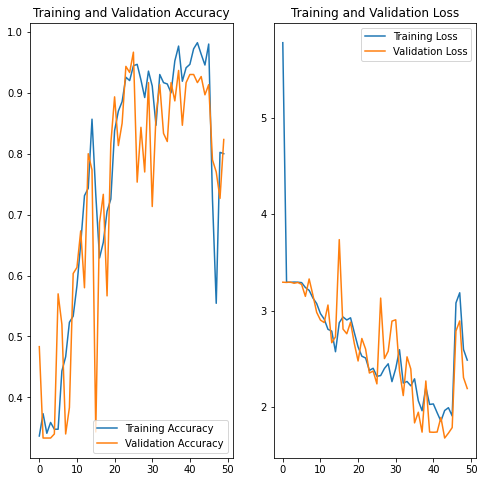

In [43]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Potato___Early_blight
predicted label: Potato___Early_blight


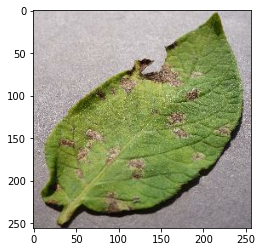

In [44]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0][0])])

In [45]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0][0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

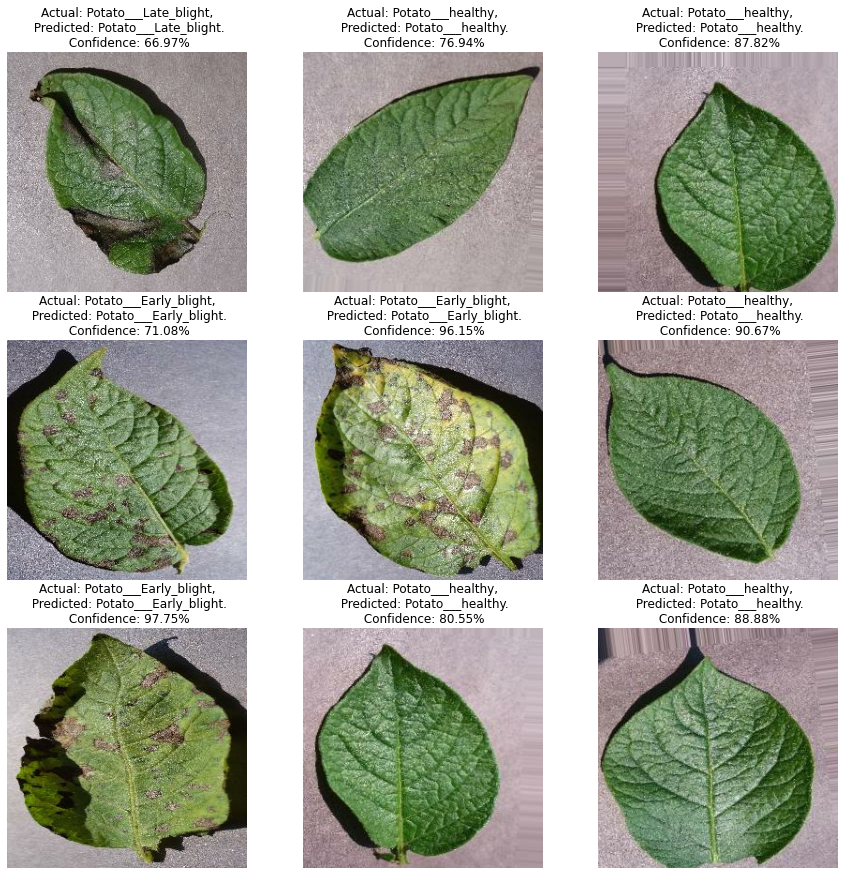

In [46]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

resnet 50 model

In [47]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)

resnet50 = tf.keras.applications.ResNet50(
    include_top=True,
    weights=None,
    input_shape=input_shape,
    classes=3
)

In [48]:
resnet50.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [49]:
resnet50.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [50]:
history = resnet50.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=50,
)

Epoch 1/50
29/29 [==============================] - 22s 516ms/step - loss: 1.2339 - accuracy: 0.7033 - val_loss: 318511.7812 - val_accuracy: 0.3333
Epoch 2/50
29/29 [==============================] - 12s 432ms/step - loss: 0.3246 - accuracy: 0.8967 - val_loss: 10019.8076 - val_accuracy: 0.3333
Epoch 3/50
29/29 [==============================] - 13s 438ms/step - loss: 0.1251 - accuracy: 0.9500 - val_loss: 10.3348 - val_accuracy: 0.4733
Epoch 4/50
29/29 [==============================] - 13s 445ms/step - loss: 0.1122 - accuracy: 0.9544 - val_loss: 3.1166 - val_accuracy: 0.5067
Epoch 5/50
29/29 [==============================] - 13s 442ms/step - loss: 0.1084 - accuracy: 0.9644 - val_loss: 0.9703 - val_accuracy: 0.6600
Epoch 6/50
29/29 [==============================] - 12s 430ms/step - loss: 0.0797 - accuracy: 0.9811 - val_loss: 1.9220 - val_accuracy: 0.3700
Epoch 7/50
29/29 [==============================] - 13s 436ms/step - loss: 0.0438 - accuracy: 0.9833 - val_loss: 0.7867 - val_accura

In [ ]:
scores = resnet50.evaluate(test_ds)

10/10 [==============================] - 1s 123ms/step - loss: 0.0702 - accuracy: 0.9800


In [ ]:
scores

[0.07015687227249146, 0.9800000190734863]

In [ ]:
history

In [ ]:
history.params

{'epochs': 50, 'steps': 29, 'verbose': 1}

In [ ]:
history.history

{'accuracy': [0.7388888597488403,
  0.902222216129303,
  0.9411110877990723,
  0.9333333373069763,
  0.9677777886390686,
  0.9711111187934875,
  0.9755555391311646,
  0.9755555391311646,
  0.9655555486679077,
  0.9755555391311646,
  0.9599999785423279,
  0.9644444584846497,
  0.9844444394111633,
  0.9855555295944214,
  0.9855555295944214,
  0.9944444298744202,
  0.9844444394111633,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 'loss': [1.4396393299102783,
  0.2719314992427826,
  0.1919267326593399,
  0.17702238261699677,
  0.08081033825874329,
  0.07392586767673492,
  0.07122496515512466,
  0.0684935674071312,
  0.09622026979923248,
  0.06853222101926804,
  0.11960778385400772,
  0.11519923061132431,
  0.04659370705485344,
  0.034991998225450516,
  0.036940235644578934,
  0.015201992355287075,
  0.0411

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

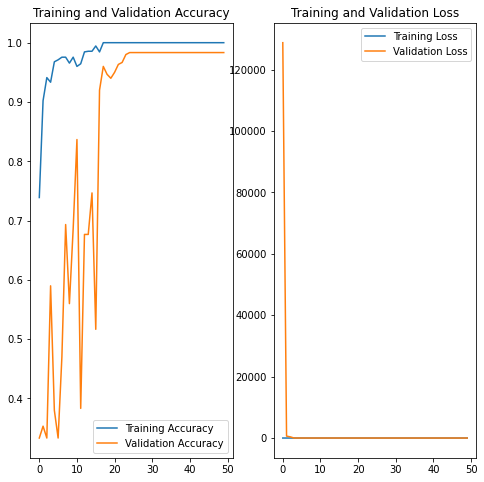

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Potato___healthy
predicted label: Potato___healthy


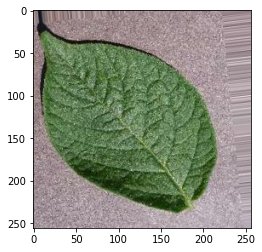

In [ ]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = resnet50.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [ ]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

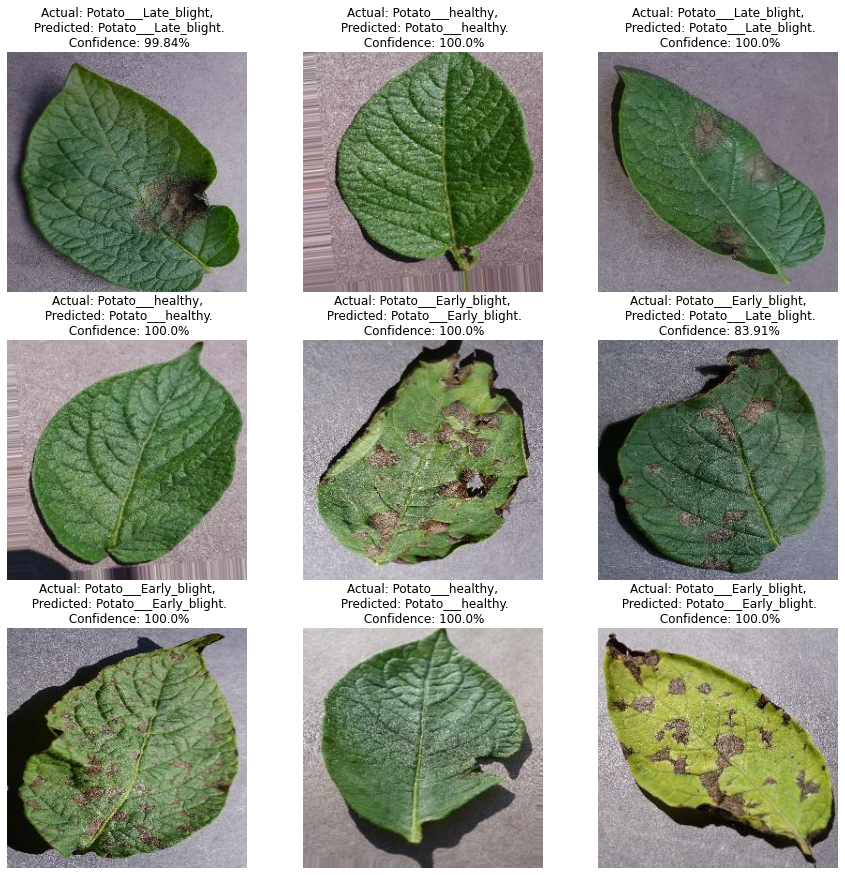

In [ ]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(resnet50, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

VGG16

In [ ]:
vgg16 = tf.keras.applications.VGG16(
    include_top=True,
    weights=None,
    input_shape=input_shape,
    classes=3,
    classifier_activation="softmax",
)

In [ ]:
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [ ]:
vgg16.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
history = vgg16.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=50,
)

Epoch 1/50
29/29 [==============================] - 30s 735ms/step - loss: 287.1747 - accuracy: 0.2967 - val_loss: 1.0967 - val_accuracy: 0.3333
Epoch 2/50
29/29 [==============================] - 17s 603ms/step - loss: 1.1021 - accuracy: 0.2978 - val_loss: 1.1011 - val_accuracy: 0.3333
Epoch 3/50
29/29 [==============================] - 18s 609ms/step - loss: 1.0994 - accuracy: 0.3300 - val_loss: 1.0987 - val_accuracy: 0.3333
Epoch 4/50
29/29 [==============================] - 17s 600ms/step - loss: 1.0993 - accuracy: 0.3078 - val_loss: 1.0987 - val_accuracy: 0.3333
Epoch 5/50
29/29 [==============================] - 17s 598ms/step - loss: 1.0990 - accuracy: 0.3333 - val_loss: 1.0987 - val_accuracy: 0.3333
Epoch 6/50
29/29 [==============================] - 17s 598ms/step - loss: 1.0989 - accuracy: 0.3333 - val_loss: 1.0988 - val_accuracy: 0.3333
Epoch 7/50
29/29 [==============================] - 17s 599ms/step - loss: 1.0989 - accuracy: 0.3067 - val_loss: 1.0987 - val_accuracy: 0.33

In [ ]:
scores = vgg16.evaluate(test_ds)

10/10 [==============================] - 2s 182ms/step - loss: 1.0989 - accuracy: 0.3333


In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

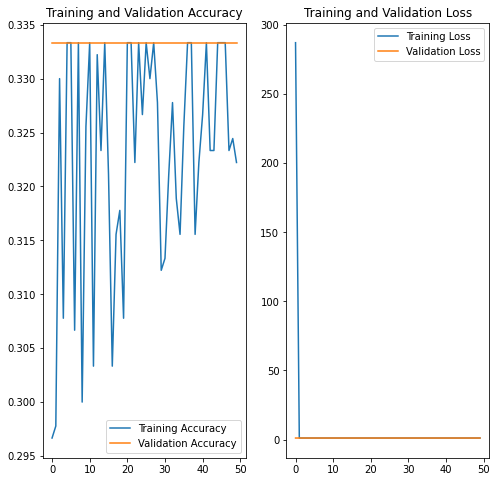

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()